In [1]:
# Run the notebook as if it's in the PROJECT directory
%bookmark PROJ_ROOT /reg/data/ana03/scratch/cwang31/pf
%cd -b PROJ_ROOT

(bookmark:PROJ_ROOT) -> /reg/data/ana03/scratch/cwang31/pf
/reg/data/ana03/scratch/cwang31/pf


In [2]:
# Load paths for using psana
%env SIT_ROOT=/reg/g/psdm/
%env SIT_DATA=/cds/group/psdm/data/
%env SIT_PSDM_DATA=/cds/data/psdm/

env: SIT_ROOT=/reg/g/psdm/
env: SIT_DATA=/cds/group/psdm/data/
env: SIT_PSDM_DATA=/cds/data/psdm/


In [4]:
import pickle
import os
import sys
import torch
from peaknet.datasets.fastdata  import ConfigDataset, SFXPanelDatasetMini

# Set up parameters for an experiment...
basename             = "cxic0415"
# basename             = "cxilp9515"
# basename             = "cxilz0720"
fl_csv               = f"{basename}.csv"
drc_project          = os.getcwd()
size_sample_train    = 500
size_sample_validate = 500
frac_train           = 1.0
frac_validate        = None
dataset_usage        = 'train'

seed = 0

# [[[ DATASET ]]]
# Config the dataset...
config_dataset = ConfigDataset( fl_csv        = fl_csv,
                                drc_project   = drc_project,
                                size_sample   = size_sample_train,
                                dataset_usage = dataset_usage,
                                trans         = None,
                                frac_train    = frac_train,
                                frac_validate = frac_validate,
                                mpi_comm      = None,
                                seed          = seed,
                                mask_radius   = 3,
                                is_batch_mask = True,
                                snr_threshold = 1.0, )

# Define the training set
dataset_train = SFXPanelDatasetMini(config_dataset)

In [5]:
len(dataset_train)

500

In [6]:
img, label = dataset_train[0]

In [7]:
img_viz = img[0]

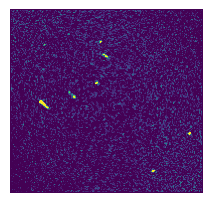

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (1.929,1.929))
vmin = img_viz.mean()
vmax = img_viz.mean() + 4 * img_viz.std()
plt.imshow(img_viz, vmin = vmin, vmax = vmax)

plt.xticks([])
plt.yticks([])
# plt.colorbar()
plt.gca().spines['top'   ].set_visible(False)
plt.gca().spines['right' ].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'  ].set_visible(False)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0)
plt.set_cmap('viridis')

In [ ]:
img.shape

In [ ]:
label.shape

In [ ]:
dataset_train.metadata_list[0]

In [ ]:
import h5py
fl_cxi = './cxilp9515/cwang31/psocake/r0113/cxilp9515_0113_default.cxi'
with h5py.File(fl_cxi, 'r') as fh:
    # Fetch raw image and mask...
    ## raw_img = fh["/entry_1/instrument_1/detector_1/data"][event_crystfel]
    raw_img = fh["/entry_1/data_1/data"][325]
    mask    = fh["/entry_1/data_1/mask"][325]

In [ ]:
import h5py
fl_cxi = '/reg/data/ana03/scratch/cwang31/pf/cxilz0720/cwang31/psocake/r0112/cxilz0720_0112_22_train.cxi'
with h5py.File(fl_cxi, 'r') as fh:
    # Fetch raw image and mask...
    ## raw_img = fh["/entry_1/instrument_1/detector_1/data"][event_crystfel]
    raw_img = fh["/entry_1/data_1/data"][325]
    mask    = fh["/entry_1/data_1/mask"][()]

In [ ]:
mask.shape

In [ ]:
raw_img.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
vmin = raw_img.mean()
vmax = raw_img.mean() + 4 * raw_img.std()
plt.imshow(raw_img, vmin = vmin, vmax = vmax)